In [ ]:
#NURUL ATHIRA BINTI ZUKIFLI  S21A0050
import pandas as pd

data = pd.read_csv('Mental Health Dataset.csv')
data.head()
print(data.shape)

(292364, 17)


In [ ]:
data.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,734,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,2014-08-27 12:31:41,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,780,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [ ]:
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Gender_Male Country_Belgium Country_Bosnia and Herzegovina  \
count       292364          292364                         292364   
unique           2               2                              2   
top           True           False                          False   
freq        239850          291540                         291974   

       Country_Brazil Country_Canada Country_Colombia Country_Costa Rica  \
count          292364         292364           292364             292364   
unique              2              2                2                  2   
top             False          False            False              False   
freq           290024         273638           291974             291974   

       Country_Croatia Country_Czech Republic Country_Denmark  ...  \
count           292364                 292364          292364  ...   
unique               2                      2               2  ...   
top              False                  Fa

In [ ]:
# identify missing data
a = data.isnull().any()
b = data.isnull().sum()

print(a)
print()
print(b)

Timestamp                  False
Gender                     False
Country                    False
Occupation                 False
self_employed               True
family_history             False
treatment                  False
Days_Indoors               False
Growing_Stress             False
Changes_Habits             False
Mental_Health_History      False
Mood_Swings                False
Coping_Struggles           False
Work_Interest              False
Social_Weakness            False
mental_health_interview    False
care_options               False
dtype: bool

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Inter

In [ ]:
data=data.dropna()

In [ ]:
# identify missing data
a = data.isnull().any()
b = data.isnull().sum()

print(a)
print()
print(b)

Timestamp                  False
Gender                     False
Country                    False
Occupation                 False
self_employed              False
family_history             False
treatment                  False
Days_Indoors               False
Growing_Stress             False
Changes_Habits             False
Mental_Health_History      False
Mood_Swings                False
Coping_Struggles           False
Work_Interest              False
Social_Weakness            False
mental_health_interview    False
care_options               False
dtype: bool

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness     

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()





0

In [ ]:
# mapping binary
# perform binary encode
df = pd.DataFrame(data)
col = ['family_history','treatment','Growing_Stress', 'Gender',
       'Changes_Habits','Mental_Health_History','Coping_Struggles',
       'Work_Interest','Social_Weakness','mental_health_interview','care_options',
       'Occupation', 'Mood_Swings']

# Mapping 'yes' and 'no' to 1 and 0 respectively
binary_map = {'Yes': 1, 'No': 0, 'Maybe':2, 'Not sure':2, 'Housewife': 0, 'Corporate':1, 'Business':1,
              'Others': 1, 'Student': 0, 'High': 3, 'Low': 1, 'Medium':2, 'Male':0, 'Female':1}

# Apply binary encoding to each column
for col in df[col].columns:
    df[col] = df[col].map(binary_map) # Fill NaNs with a placeholder (-1) or handle them as needed


# add id columns as mapping for a person to avoid pandas read as duplicated
df.insert(0, 'id', range(1, len(df) + 1))  # Inserts 'id' column at position 0

print("Original DataFrame:")
df.head()

Original DataFrame:


,id,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,1,2014-08-27 11:37:59,1,United States,1,No,1,1,1-14 days,1,0,1,2,0,0,1,2,1
4,2,2014-08-27 11:43:36,1,United States,1,No,1,1,1-14 days,1,0,1,2,0,0,1,0,1
5,3,2014-08-27 11:49:51,1,Poland,1,No,0,1,1-14 days,1,0,1,2,0,0,1,2,2
6,4,2014-08-27 11:51:34,1,Australia,1,No,1,1,1-14 days,1,0,1,2,0,0,1,0,2
7,5,2014-08-27 11:52:41,1,United States,1,No,0,0,1-14 days,1,0,1,2,0,0,1,0,0


In [ ]:
df['Mood_Swings'].value_counts()

Mood_Swings
2    99272
1    98062
3    89474
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286808 entries, 3 to 292363
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       286808 non-null  int64 
 1   Timestamp                286808 non-null  object
 2   Gender                   286808 non-null  int64 
 3   Country                  286808 non-null  object
 4   Occupation               286808 non-null  int64 
 5   self_employed            286808 non-null  object
 6   family_history           286808 non-null  int64 
 7   treatment                286808 non-null  int64 
 8   Days_Indoors             286808 non-null  object
 9   Growing_Stress           286808 non-null  int64 
 10  Changes_Habits           286808 non-null  int64 
 11  Mental_Health_History    286808 non-null  int64 
 12  Mood_Swings              286808 non-null  int64 
 13  Coping_Struggles         286808 non-null  int64 
 14  Work_Interest            

In [ ]:
if 'id' in df.columns:
    del df['id']
    del df['Timestamp']
    del df['self_employed']
    del df['Country']
    del df['Days_Indoors']


<Axes: >

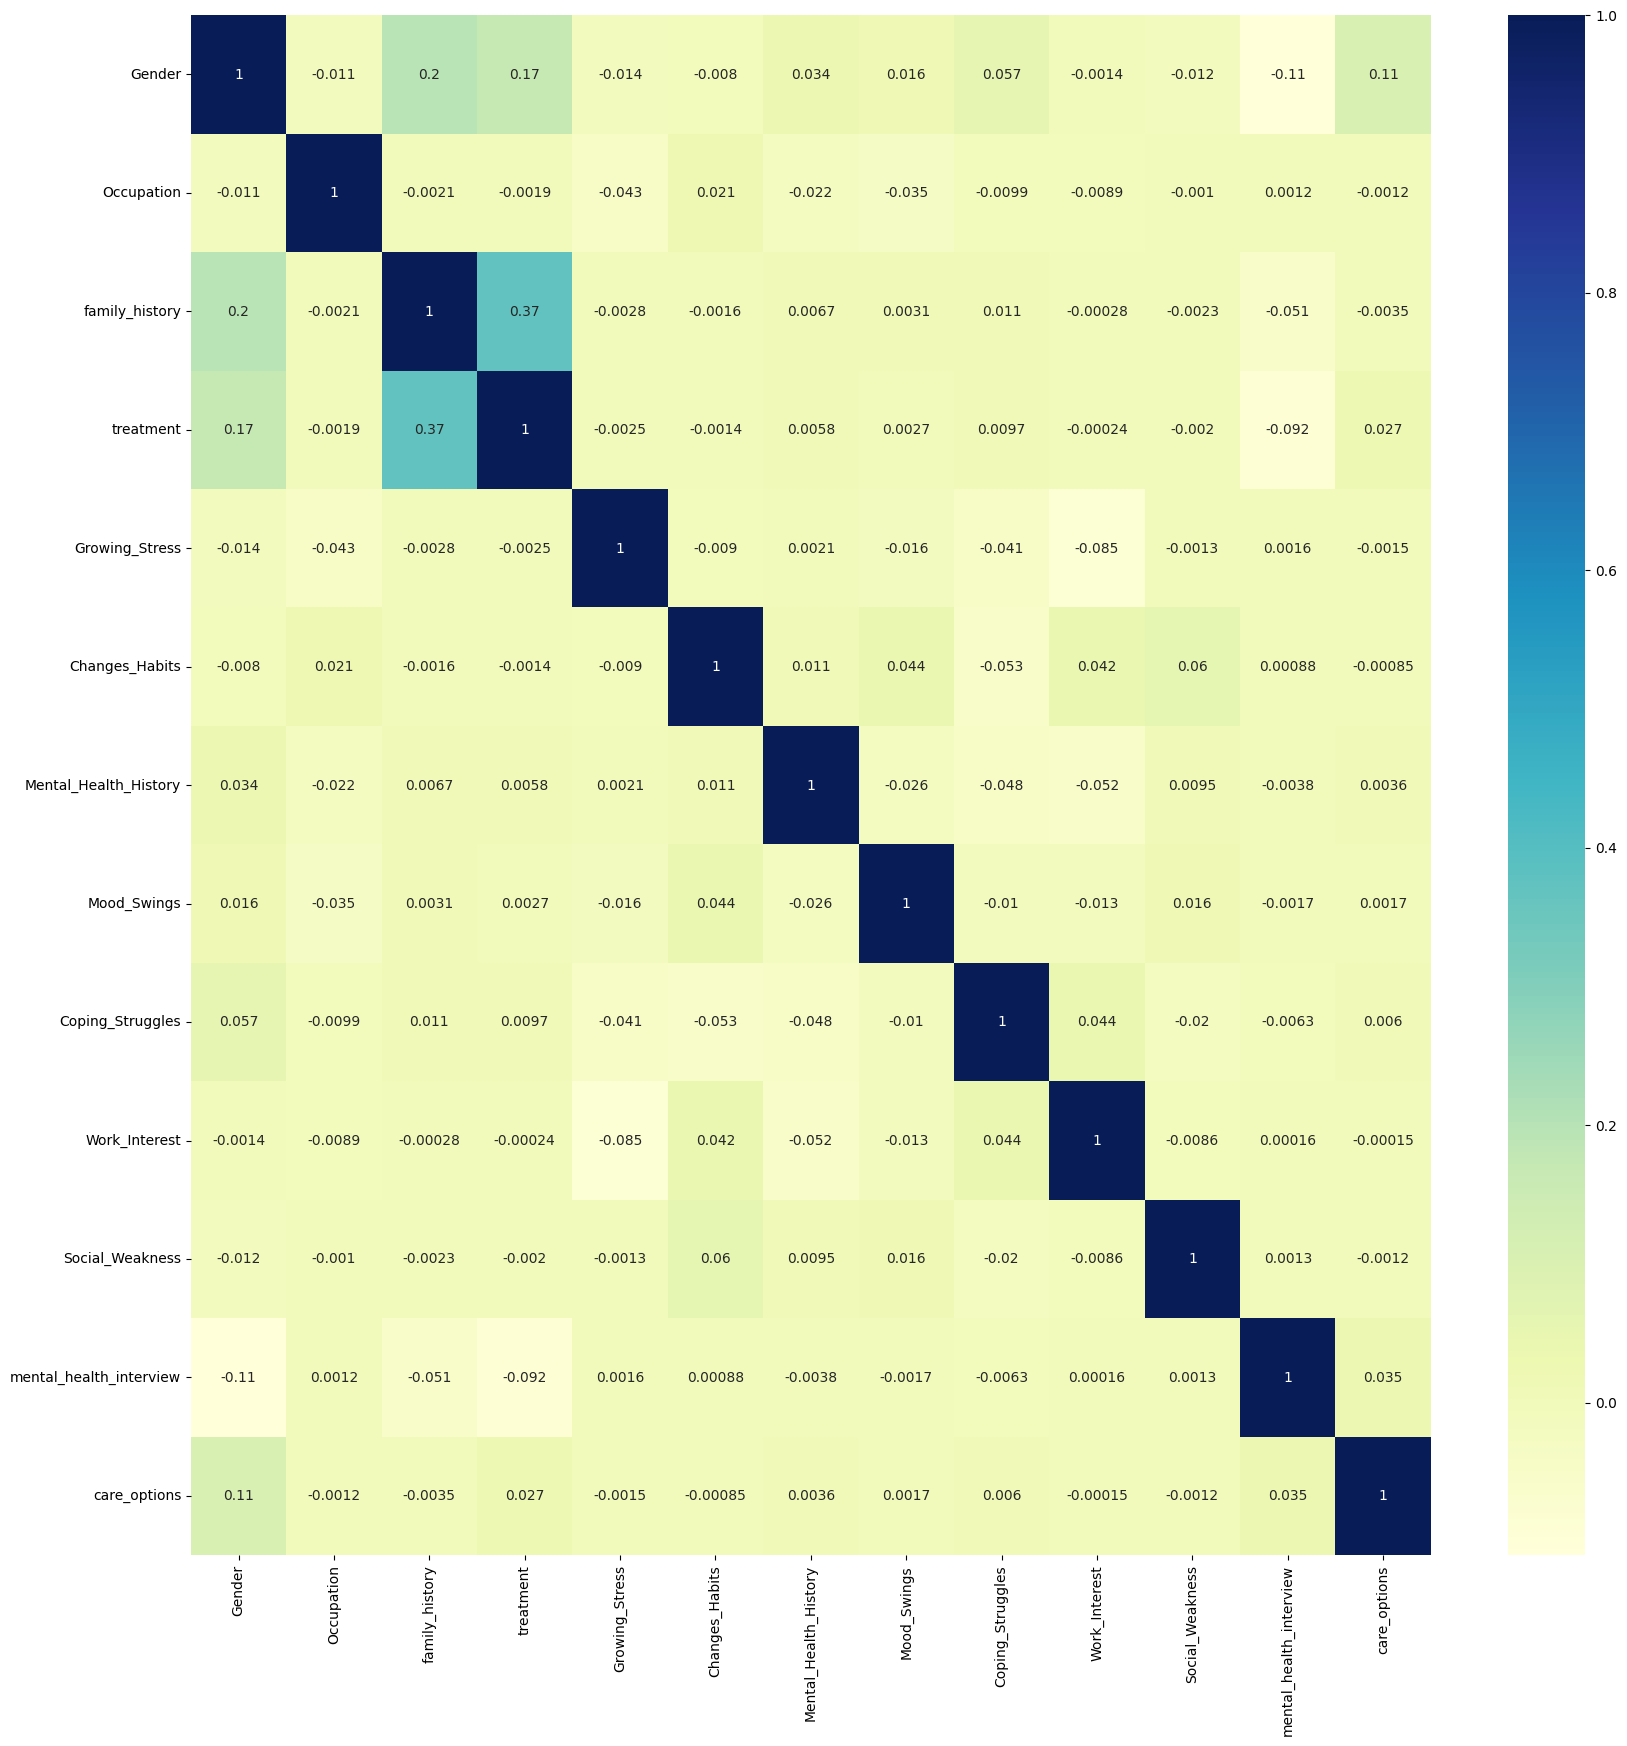

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')

Data Visualization

In [ ]:
# Combine Days_Indoors columns into a single categorical column
days_indoors_cols = ['Days_Indoors_15-30 days', 'Days_Indoors_31-60 days', 'Days_Indoors_Go out Every day', 'Days_Indoors_More than 2 months']
data['Days_Indoors'] = data[days_indoors_cols].idxmax(axis=1).str.replace('Days_Indoors_', '')

# Verify the new column
print(data['Days_Indoors'].value_counts())


Days_Indoors
15-30 days            117377
31-60 days             60705
Go out Every day       58366
More than 2 months     55916
Name: count, dtype: int64


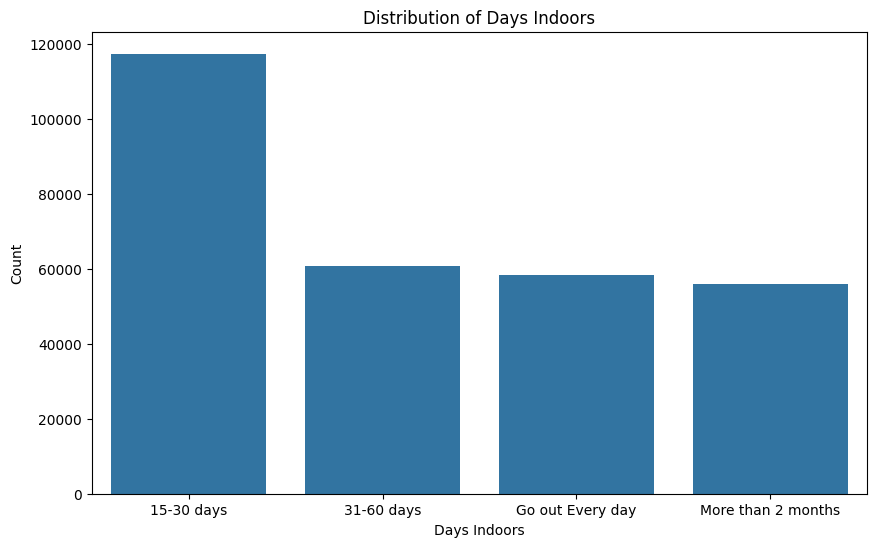

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart for 'Days_Indoors'
plt.figure(figsize=(10, 6))
sns.countplot(x='Days_Indoors', data=data, order=data['Days_Indoors'].value_counts().index)
plt.title('Distribution of Days Indoors')
plt.xlabel('Days Indoors')
plt.ylabel('Count')
plt.show()
#the distribution of the Days_Indoors column

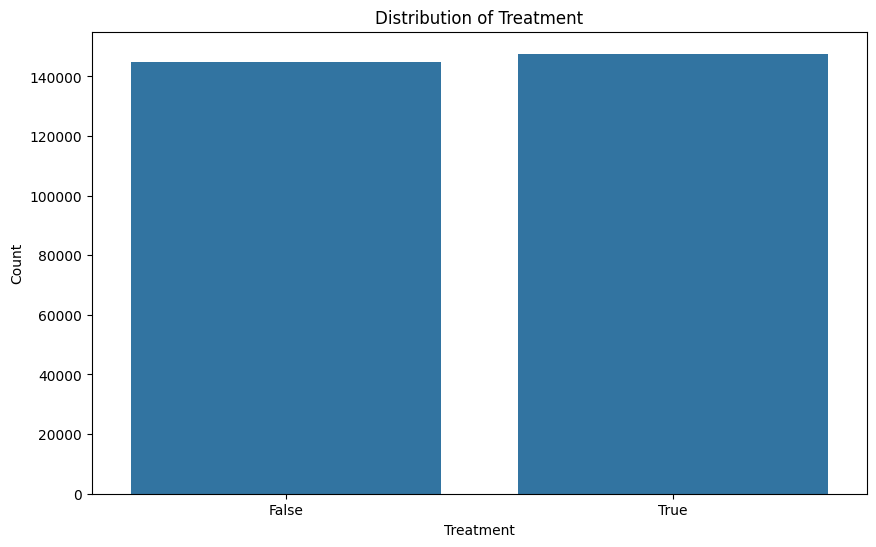

In [ ]:
#Univariate Visualization: Distribution of Treatment

plt.figure(figsize=(10, 6))
sns.countplot(x='treatment_Yes', data=data)
plt.title('Distribution of Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


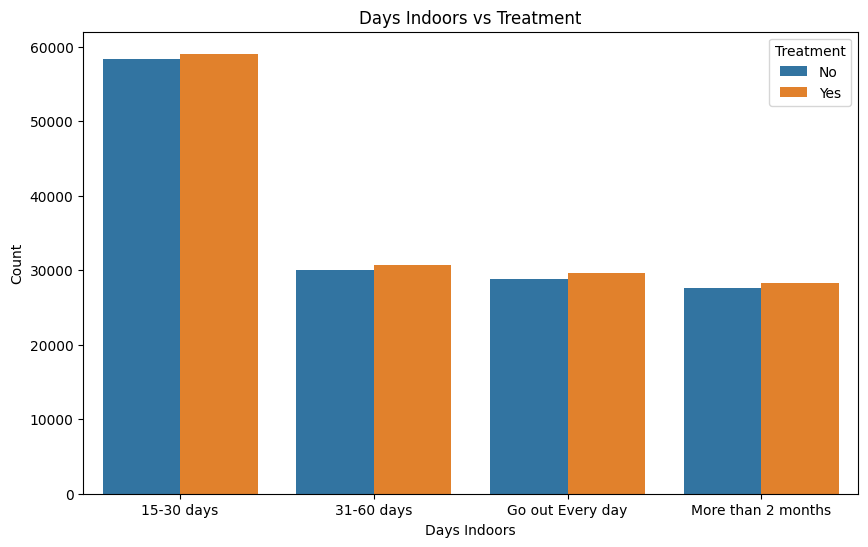

In [ ]:
#Bivariate Visualization: Days_Indoors vs Treatment

plt.figure(figsize=(10, 6))
sns.countplot(x='Days_Indoors', hue='treatment_Yes', data=data, order=data['Days_Indoors'].value_counts().index)
plt.title('Days Indoors vs Treatment')
plt.xlabel('Days Indoors')
plt.ylabel('Count')
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()


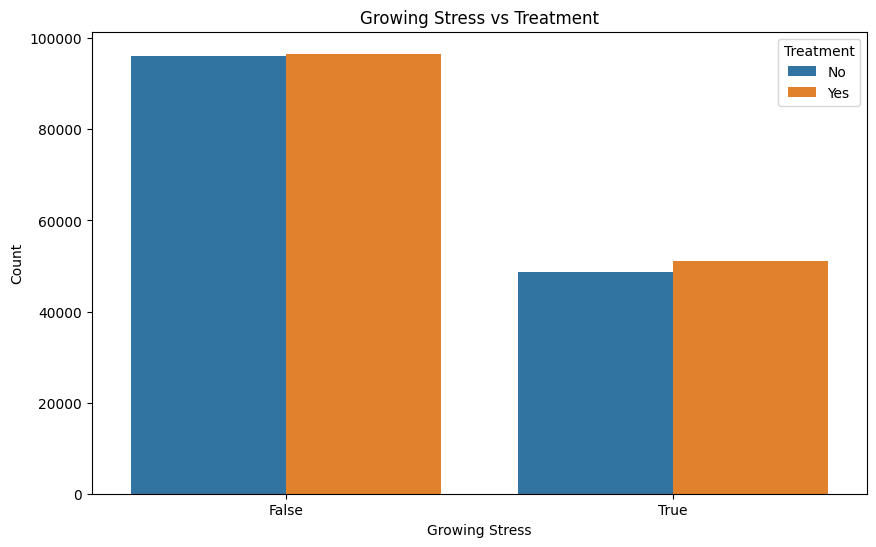

In [ ]:
#Bivariate Visualization: Growing_Stress vs Treatment

plt.figure(figsize=(10, 6))
sns.countplot(x='Growing_Stress_Yes', hue='treatment_Yes', data=data)
plt.title('Growing Stress vs Treatment')
plt.xlabel('Growing Stress')
plt.ylabel('Count')
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()


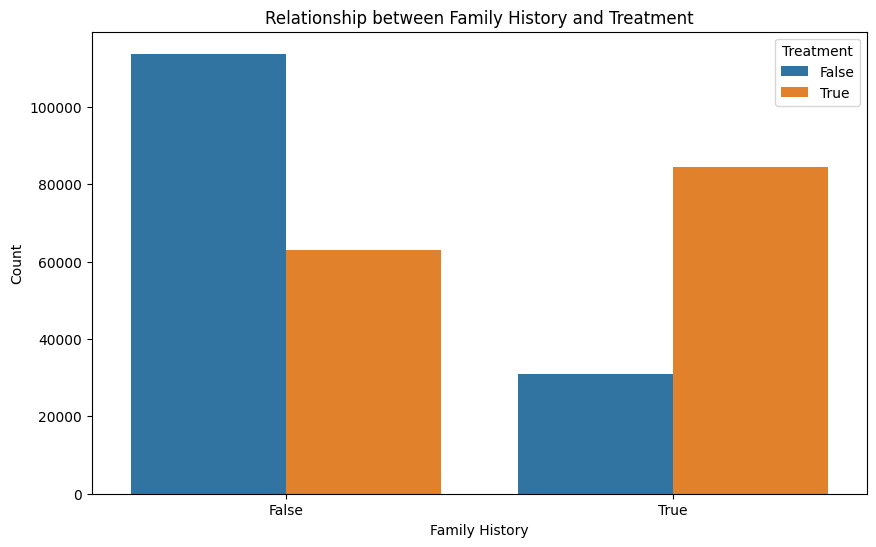

In [ ]:
#Bivariate Visualization: Relationship between 'Family History' and 'Treatment'
# Plot a bar chart to show the relationship between 'Family History' and 'Treatment'
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_Yes', hue='treatment_Yes', data=data)
plt.title('Relationship between Family History and Treatment')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Algorithm Random Forest


Accuracy: 0.9642399055974552
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     20120
           1       0.95      0.96      0.96     20241
           2       0.96      0.96      0.96     18112

    accuracy                           0.96     58473
   macro avg       0.96      0.96      0.96     58473
weighted avg       0.96      0.96      0.96     58473

Confusion Matrix:
 [[19690   274   156]
 [  258 19370   613]
 [  139   651 17322]]


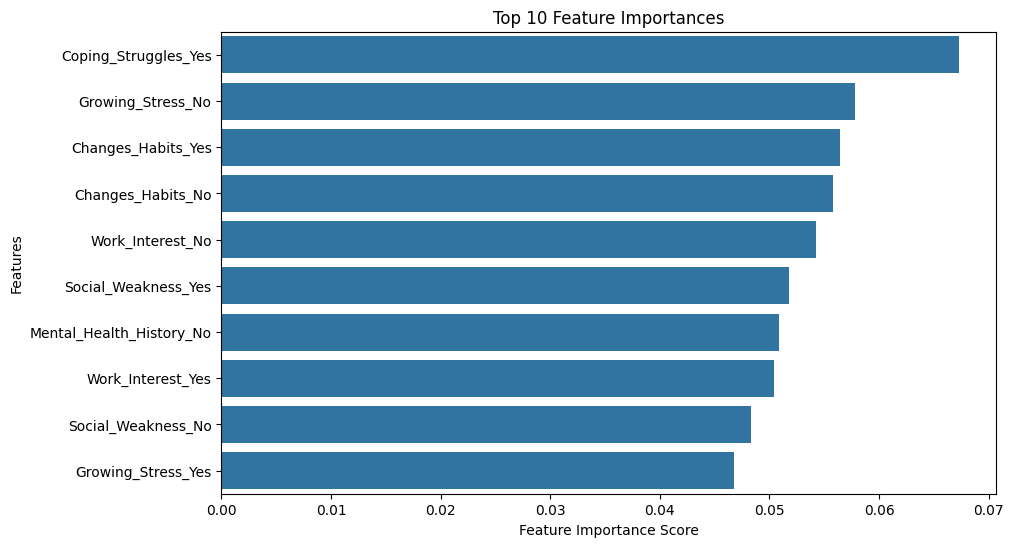

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Mental Health Dataset.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Fill missing values with the median for numeric columns and mode for categorical columns
data = data.fillna(data.median(numeric_only=True))

# Map categorical values to numerical labels
mood_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['Mood_Swings'] = data['Mood_Swings'].map(mood_mapping)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define the features and the target variable
X = data.drop('Mood_Swings', axis=1)
y = data['Mood_Swings']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_features, y=top_10_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()
